In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [15]:
df = pd.read_csv('/Users/kirillanosov/Downloads/-1.csv')
df

,Data,New users organic,New users acquisition,DAU,Returning users day 1,Returning users day 7,Returning users day 28,Paying users,Gross,ARPU,ARPPU,Paying Share,Average check,Retention Day 1,Retention Day 7,Retention Day 28
0,1,171850,57283,1624496,93580,32769,11974,18536,"220256,71",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,125065,41688,1422218,70547,24112,8066,27304,"293647,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,127965,42654,1374403,79981,25070,8362,29838,"282185,27",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,124113,41370,1399891,77386,23971,7721,23771,"225309,19",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,122382,40793,1392873,72951,23307,7070,21272,"204771,62",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,127539,42513,1366728,78109,24239,7508,20797,"203509,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,154242,51414,1455376,95465,10288,9570,22002,"217335,57",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,150564,50187,1445545,83939,18826,9509,21538,"202804,49",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,123602,41200,1330308,77416,16350,7297,16670,"161714,09",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,107344,35781,1281582,65964,15436,6149,13525,"143091,28",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.fillna(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    30 non-null     int64  
 1   New users organic       30 non-null     int64  
 2   New users acquisition   30 non-null     int64  
 3   DAU                     30 non-null     int64  
 4   Returning users day 1   30 non-null     int64  
 5   Returning users day 7   30 non-null     int64  
 6   Returning users day 28  30 non-null     int64  
 7   Paying users            30 non-null     int64  
 8   Gross                   30 non-null     object 
 9   ARPU                    30 non-null     float64
 10  ARPPU                   30 non-null     float64
 11  Paying Share            30 non-null     float64
 12  Average check           30 non-null     float64
 13  Retention Day 1         30 non-null     float64
 14  Retention Day 7         30 non-null     floa

In [28]:
df['Gross'] = df['Gross'].apply(lambda x: x.replace(',', '.')).astype('float')


In [36]:
df['ARPU'] = df['Gross'] / df['DAU']

In [44]:
df['ARPPU'] = df['Gross'] / df['Paying users']


In [42]:
df['Paying Share'] = df['Paying users'] / df['DAU'] * 100


In [40]:
df['New users'] = df['New users organic'] + df['New users acquisition']

In [43]:
df['Retention Day 1'] = df['Returning users day 1'] / df['New users'] * 100
df['Retention Day 7'] = df['Returning users day 7'] / df['New users'] * 100
df['Retention Day 28'] = df['Returning users day 28'] / df['New users'] * 100
df


,Data,New users organic,New users acquisition,DAU,Returning users day 1,Returning users day 7,Returning users day 28,Paying users,Gross,ARPU,ARPPU,Paying Share,Average check,Retention Day 1,Retention Day 7,Retention Day 28,New users
0,1,171850,57283,1624496,93580,32769,11974,18536,220256.71,0.135585,11.882645,1.141031,0.0,40.840909,14.301301,5.225786,229133
1,2,125065,41688,1422218,70547,24112,8066,27304,293647.75,0.206472,10.754752,1.919818,0.0,42.306285,14.459710,4.837094,166753
2,3,127965,42654,1374403,79981,25070,8362,29838,282185.27,0.205315,9.457245,2.170979,0.0,46.876960,14.693557,4.900978,170619
3,4,124113,41370,1399891,77386,23971,7721,23771,225309.19,0.160948,9.478322,1.698061,0.0,46.763716,14.485476,4.665736,165483
4,5,122382,40793,1392873,72951,23307,7070,21272,204771.62,0.147014,9.626345,1.527203,0.0,44.707216,14.283438,4.332772,163175
5,6,127539,42513,1366728,78109,24239,7508,20797,203509.47,0.148903,9.785521,1.521663,0.0,45.932421,14.253875,4.415120,170052
6,7,154242,51414,1455376,95465,10288,9570,22002,217335.57,0.149333,9.877992,1.511774,0.0,46.419749,5.002528,4.653402,205656
7,8,150564,50187,1445545,83939,18826,9509,21538,202804.49,0.140296,9.416125,1.489957,0.0,41.812494,9.377786,4.736714,200751
8,9,123602,41200,1330308,77416,16350,7297,16670,161714.09,0.121561,9.700905,1.253093,0.0,46.975158,9.920996,4.427738,164802
9,10,107344,35781,1281582,65964,15436,6149,13525,143091.28,0.111652,10.579762,1.055336,0.0,46.088384,10.784978,4.296245,143125


Посчитать **Average check** нельзя, так как у нас нет данных о количествах транзакций

## Построим графики

Сначала графики **Retention Rate** 1, 7 и 28 дней

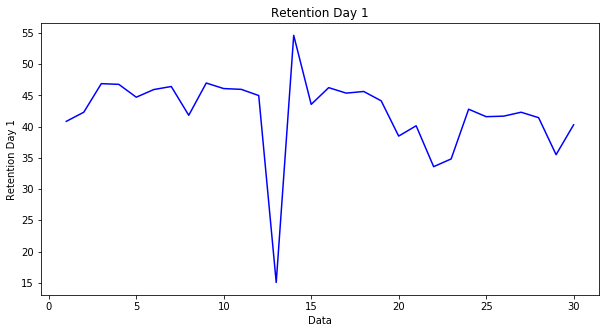

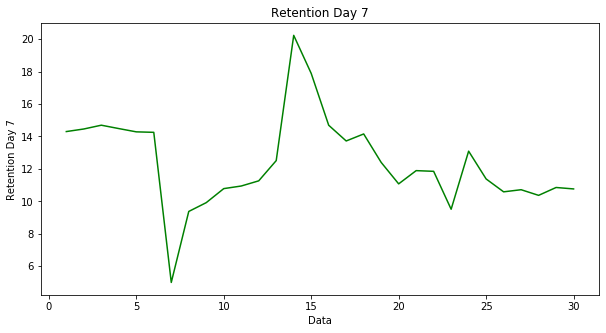

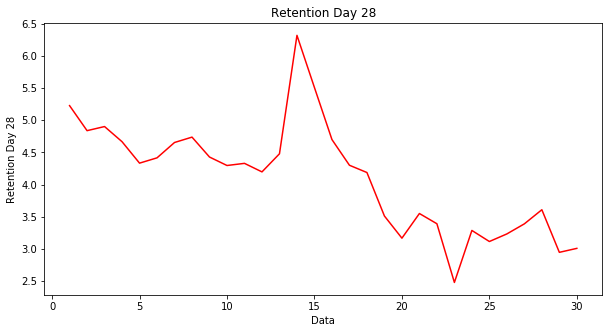

In [70]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Data', y = 'Retention Day 1', data=df, color = 'Blue')
plt.title('Retention Day 1')
plt.show()
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Data', y = 'Retention Day 7', data=df, color = 'Green')
plt.title('Retention Day 7')
plt.show()
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Data', y = 'Retention Day 28', data=df, color = 'Red')
plt.title('Retention Day 28')
plt.show()

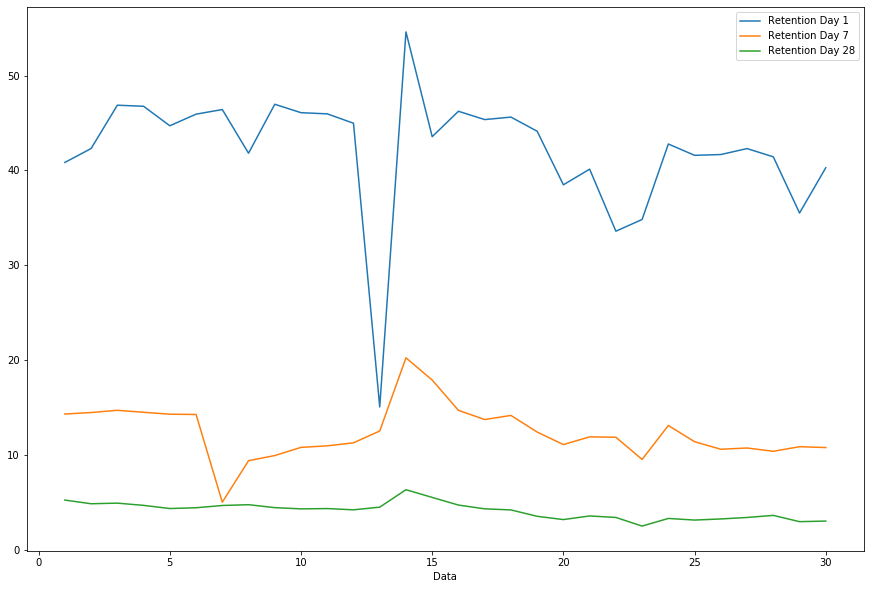

In [66]:
ret_df = df[['Data', 'Retention Day 1', 'Retention Day 7', 'Retention Day 28']]
ret_df.set_index('Data').plot(figsize = (15, 10))
plt.show()

Retention day 1 - самая неустойчивая метрика, и мы видим, что провалы в ней коррелируют с провалами в Retention day 7. А вот метрика Retention day 28 довольно устойчива

Теперь графики **ARPU** и **ARPPU**

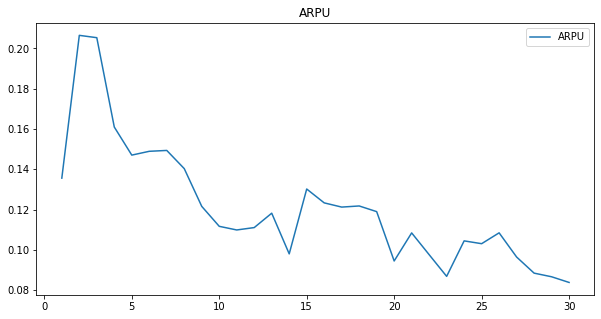

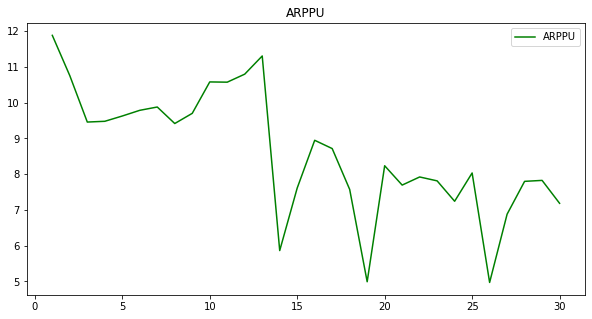

In [82]:
plt.figure(figsize=(10,5))
plt.plot(df['Data'], df['ARPU'], label = 'ARPU')
plt.title('ARPU')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df['Data'], df['ARPPU'], label = 'ARPPU', color = 'Green')
plt.title('ARPPU')
plt.legend()
plt.show()

И у ARPU и у ARPPU к концу мксяца наблюдаетсяя провал, все меньше и меньше людей начинает платить. И если у ARPU это спад относительно плавный, то у ARPPU наблюдаются значитальные провалы и затем подъемы. Нужно выяснить, чем это вызвано (может какой-то ивент/распродажа в самой игре).

График **Paying Share**

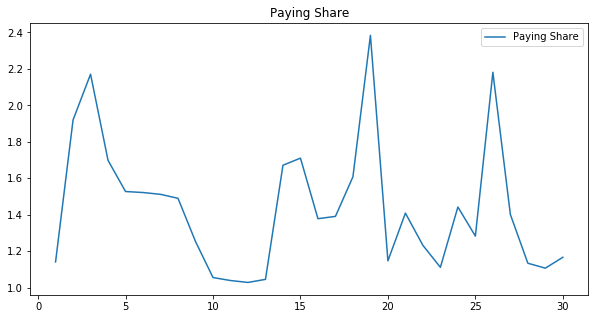

In [84]:
plt.figure(figsize=(10,5))
plt.plot(df['Data'], df['Paying Share'], label = 'Paying Share')
plt.title('Paying Share')
plt.legend()
plt.show()

Доля платящих неравномерна в течении месяца, она скачкообразна с провалами и пиками. Нужно смотреть, что в эти даты проходило в игре.

## Вывод:

Во-первых, не помешает добавить метрику "Количество транзакций".
Во-вторых, нужно обратить внимание на ARPPU и Paying Share. У нас есть непонятные всплески с непонятными провалами. Нужно это проанализировать. 
В-третьих, надо смотреть на Day 1 Retention. Там не должно быть так сильных провалов из ниоткуда как 13 числа. Эту аномалию необходимо хорошо изучить